In [1]:
import numpy  as np
import pandas as pd
from metrics import MSE
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_pickle("../Datasets/final/X_train.pkl").drop(columns=["gPlusUserId", "gPlusPlaceId"])
c = X_train.columns.tolist()
X_train = X_train.to_numpy()
X_val = pd.read_pickle("../Datasets/final/X_val.pkl").drop(columns=["gPlusUserId", "gPlusPlaceId"]).to_numpy()
X_test = pd.read_pickle("../Datasets/final/X_test.pkl").drop(columns=["gPlusUserId", "gPlusPlaceId"]).to_numpy()
y_train = pd.read_pickle("../Datasets/final/y_train.pkl").to_numpy()
y_val = pd.read_pickle("../Datasets/final/y_val.pkl").to_numpy()
y_test = pd.read_pickle("../Datasets/final/y_test.pkl").to_numpy()

In [7]:
def build_and_compile_model():
    model = tf.keras.Sequential([
        # tf.keras.layers.Dense(512, activation=tf.nn.relu),
        # tf.keras.layers.Dropout(0.2),
        # tf.keras.layers.Dense(256, activation=tf.nn.relu),
        # tf.keras.layers.Dropout(0.2),
        # tf.keras.layers.Dense(64, activation=tf.nn.relu),
        # tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(16, activation=tf.nn.relu),
        # tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                  loss=tf.keras.losses.MeanSquaredError())
    return model

In [8]:
dnn = build_and_compile_model()
dnn.build(X_train.shape)
dnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (484576, 16)              1360      
                                                                 
 dense_6 (Dense)             (484576, 1)               17        
                                                                 
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________


In [9]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
checkpoint_filepath = './dnn_model_checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

In [6]:
history = dnn.fit(x=X_train.astype('float32'), 
                  y=y_train.astype('float32'),
                  epochs=100,
                  validation_data=(X_val.astype('float32'), y_val.astype('float32')), 
                  callbacks=[early_stopping_callback, model_checkpoint_callback])

Epoch 1/100
  109/15143 [..............................] - ETA: 6s - loss: 7.3808    

2022-11-28 22:58:18.291854: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


15143/15143 [==============================] - 7s 477us/step - loss: 0.4805 - val_loss: 0.4223
Epoch 2/100
15143/15143 [==============================] - 7s 475us/step - loss: 0.4220 - val_loss: 0.4218
Epoch 3/100
15143/15143 [==============================] - 7s 472us/step - loss: 0.4215 - val_loss: 0.4291
Epoch 4/100
15143/15143 [==============================] - 7s 474us/step - loss: 0.4209 - val_loss: 0.4218
Epoch 5/100
15143/15143 [==============================] - 7s 472us/step - loss: 0.4205 - val_loss: 0.4222
Epoch 6/100
15143/15143 [==============================] - 7s 472us/step - loss: 0.4201 - val_loss: 0.4210
Epoch 7/100
15143/15143 [==============================] - 7s 472us/step - loss: 0.4197 - val_loss: 0.4211
Epoch 8/100
15143/15143 [==============================] - 7s 477us/step - loss: 0.4194 - val_loss: 0.4211
Epoch 9/100
15143/15143 [==============================] - 7s 470us/step - loss: 0.4191 - val_loss: 0.4206
Epoch 10/100
15143/15143 [=======================

In [7]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    # plt.ylim([0.2, 1])
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

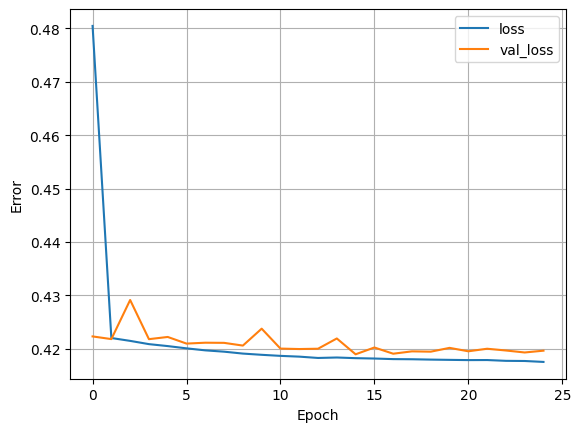

In [8]:
plot_loss(history=history)

In [10]:
dnn.load_weights(checkpoint_filepath)

In [10]:
dnn.evaluate(X_test.astype('float32'), y_test.astype('float32'))

5048/5048 [==============================] - 2s 307us/step - loss: 0.4167


0.4166768789291382

In [13]:
y_pred = dnn.predict(X_test.astype('float32')).flatten()

 548/5048 [==>...........................] - ETA: 1s

2022-11-28 23:10:45.342986: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


5048/5048 [==============================] - 1s 261us/step


In [18]:
error = []
for i in range(len(y_pred)):
    error.append(y_pred[i] - y_test[i, 0])

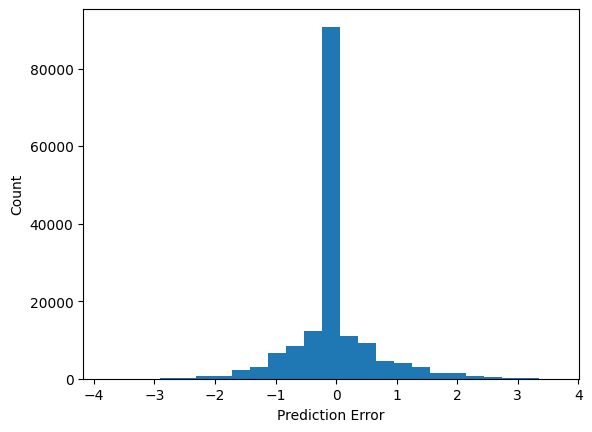

In [20]:
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

In [11]:
from metrics import MAE

In [14]:
MAE(predictions=y_pred, labels=y_test)

array([0.36540286])